   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
The entropy model's score: 0.7462857142857143
The gini model's score: 0.7462857142857143


C:\Users\VivoBook\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The logistic model's score: 0.7097142857142857
The Naive Bayes model's score: 0.7448571428571429


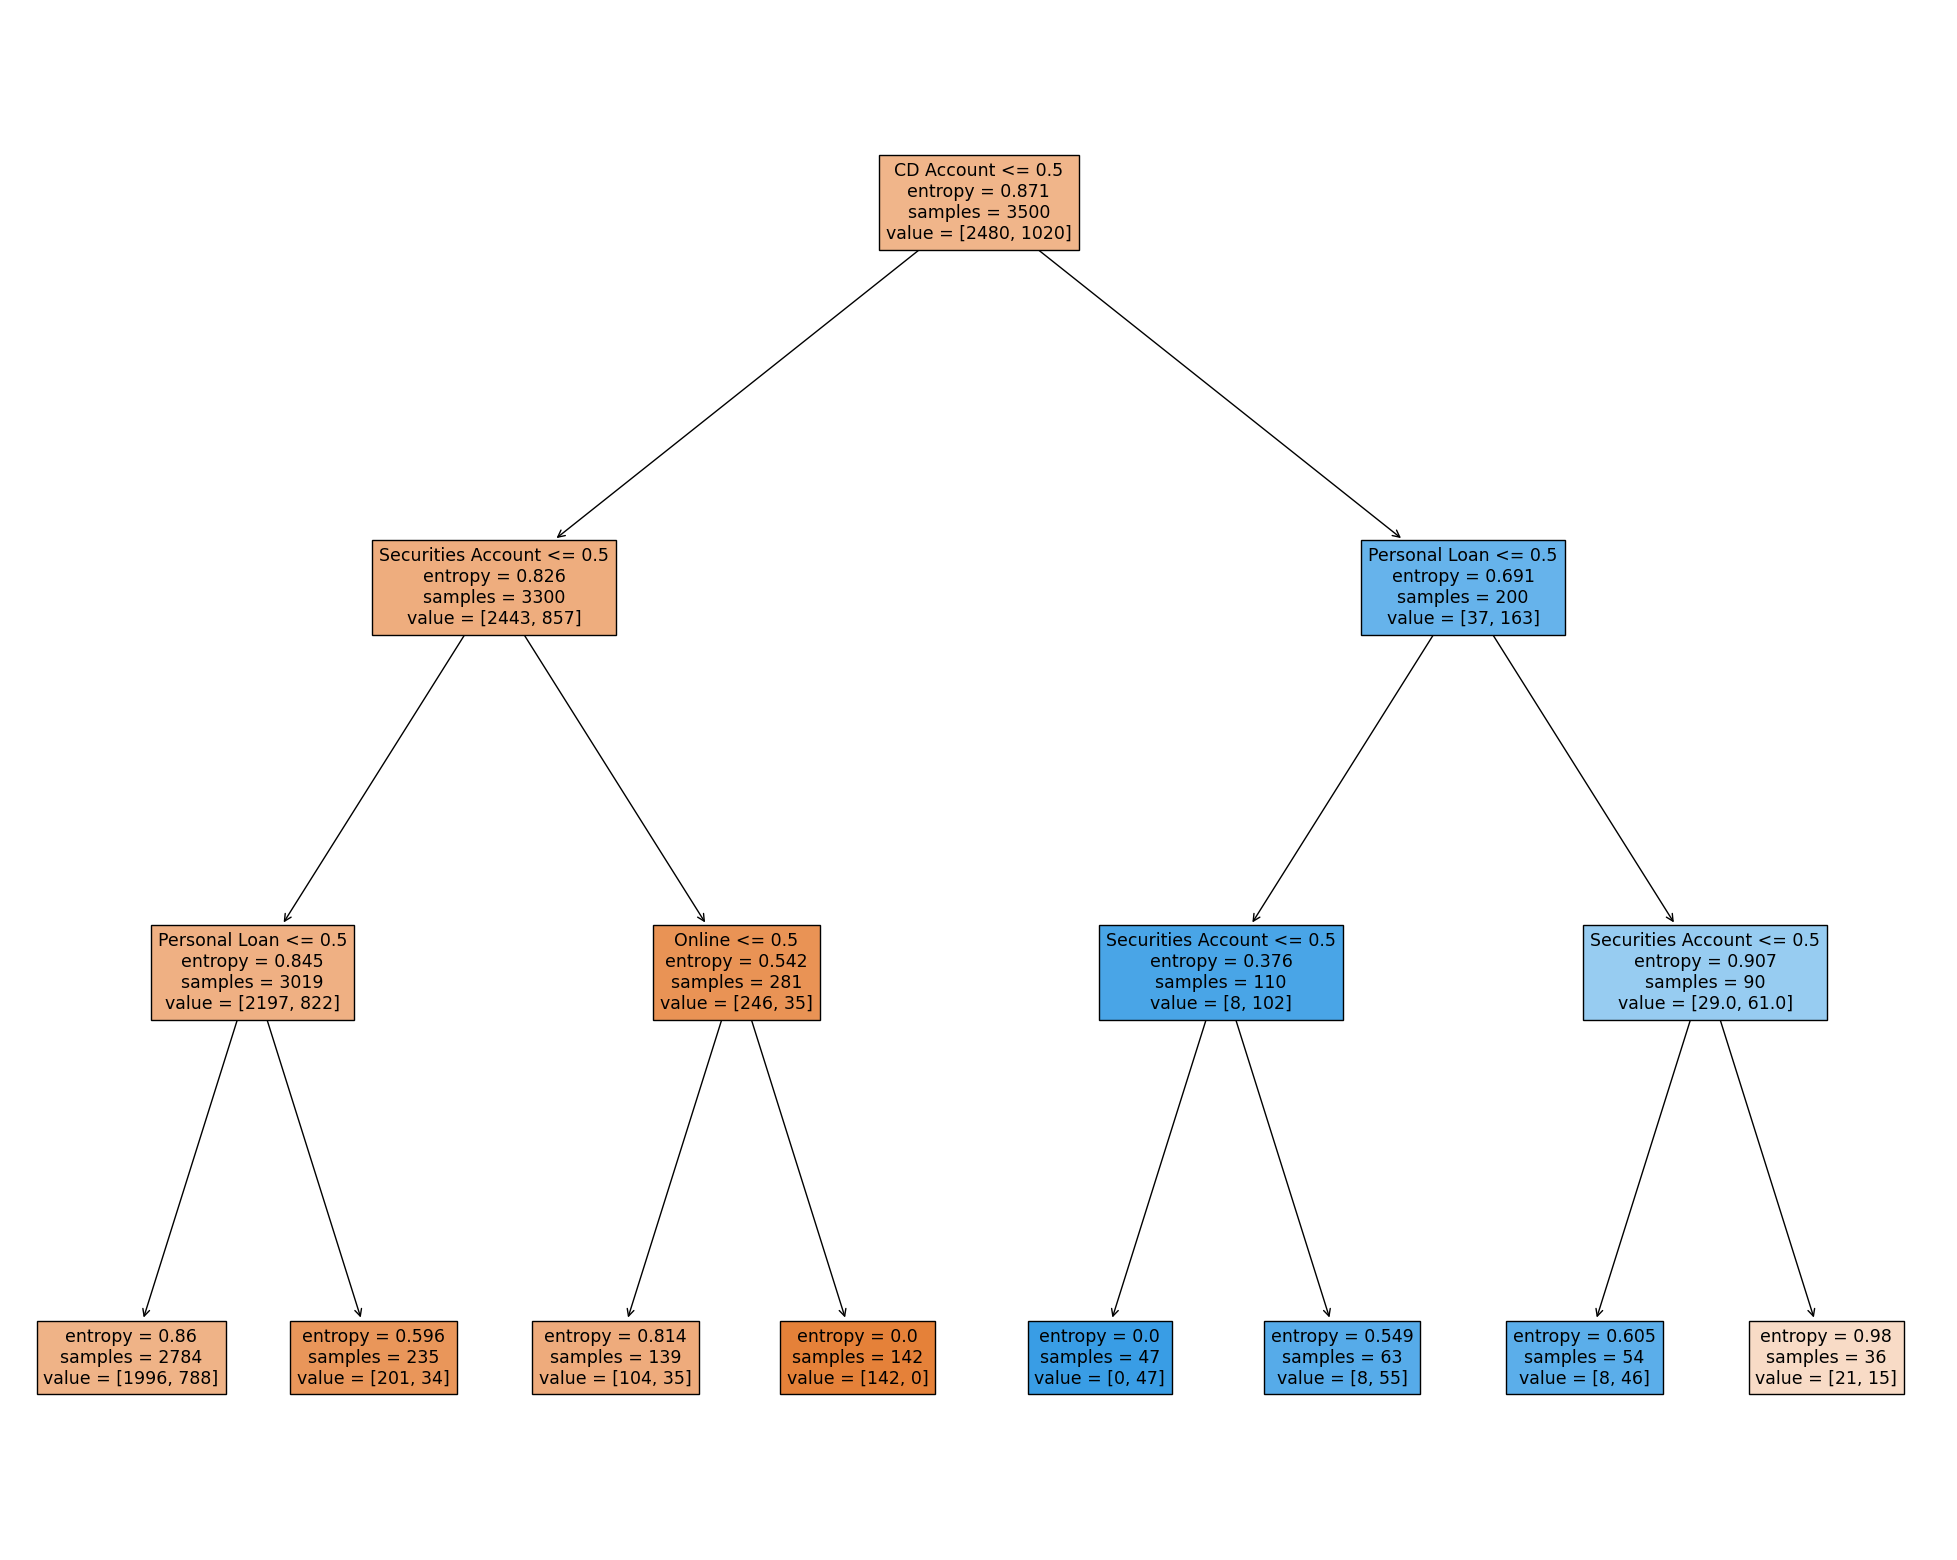

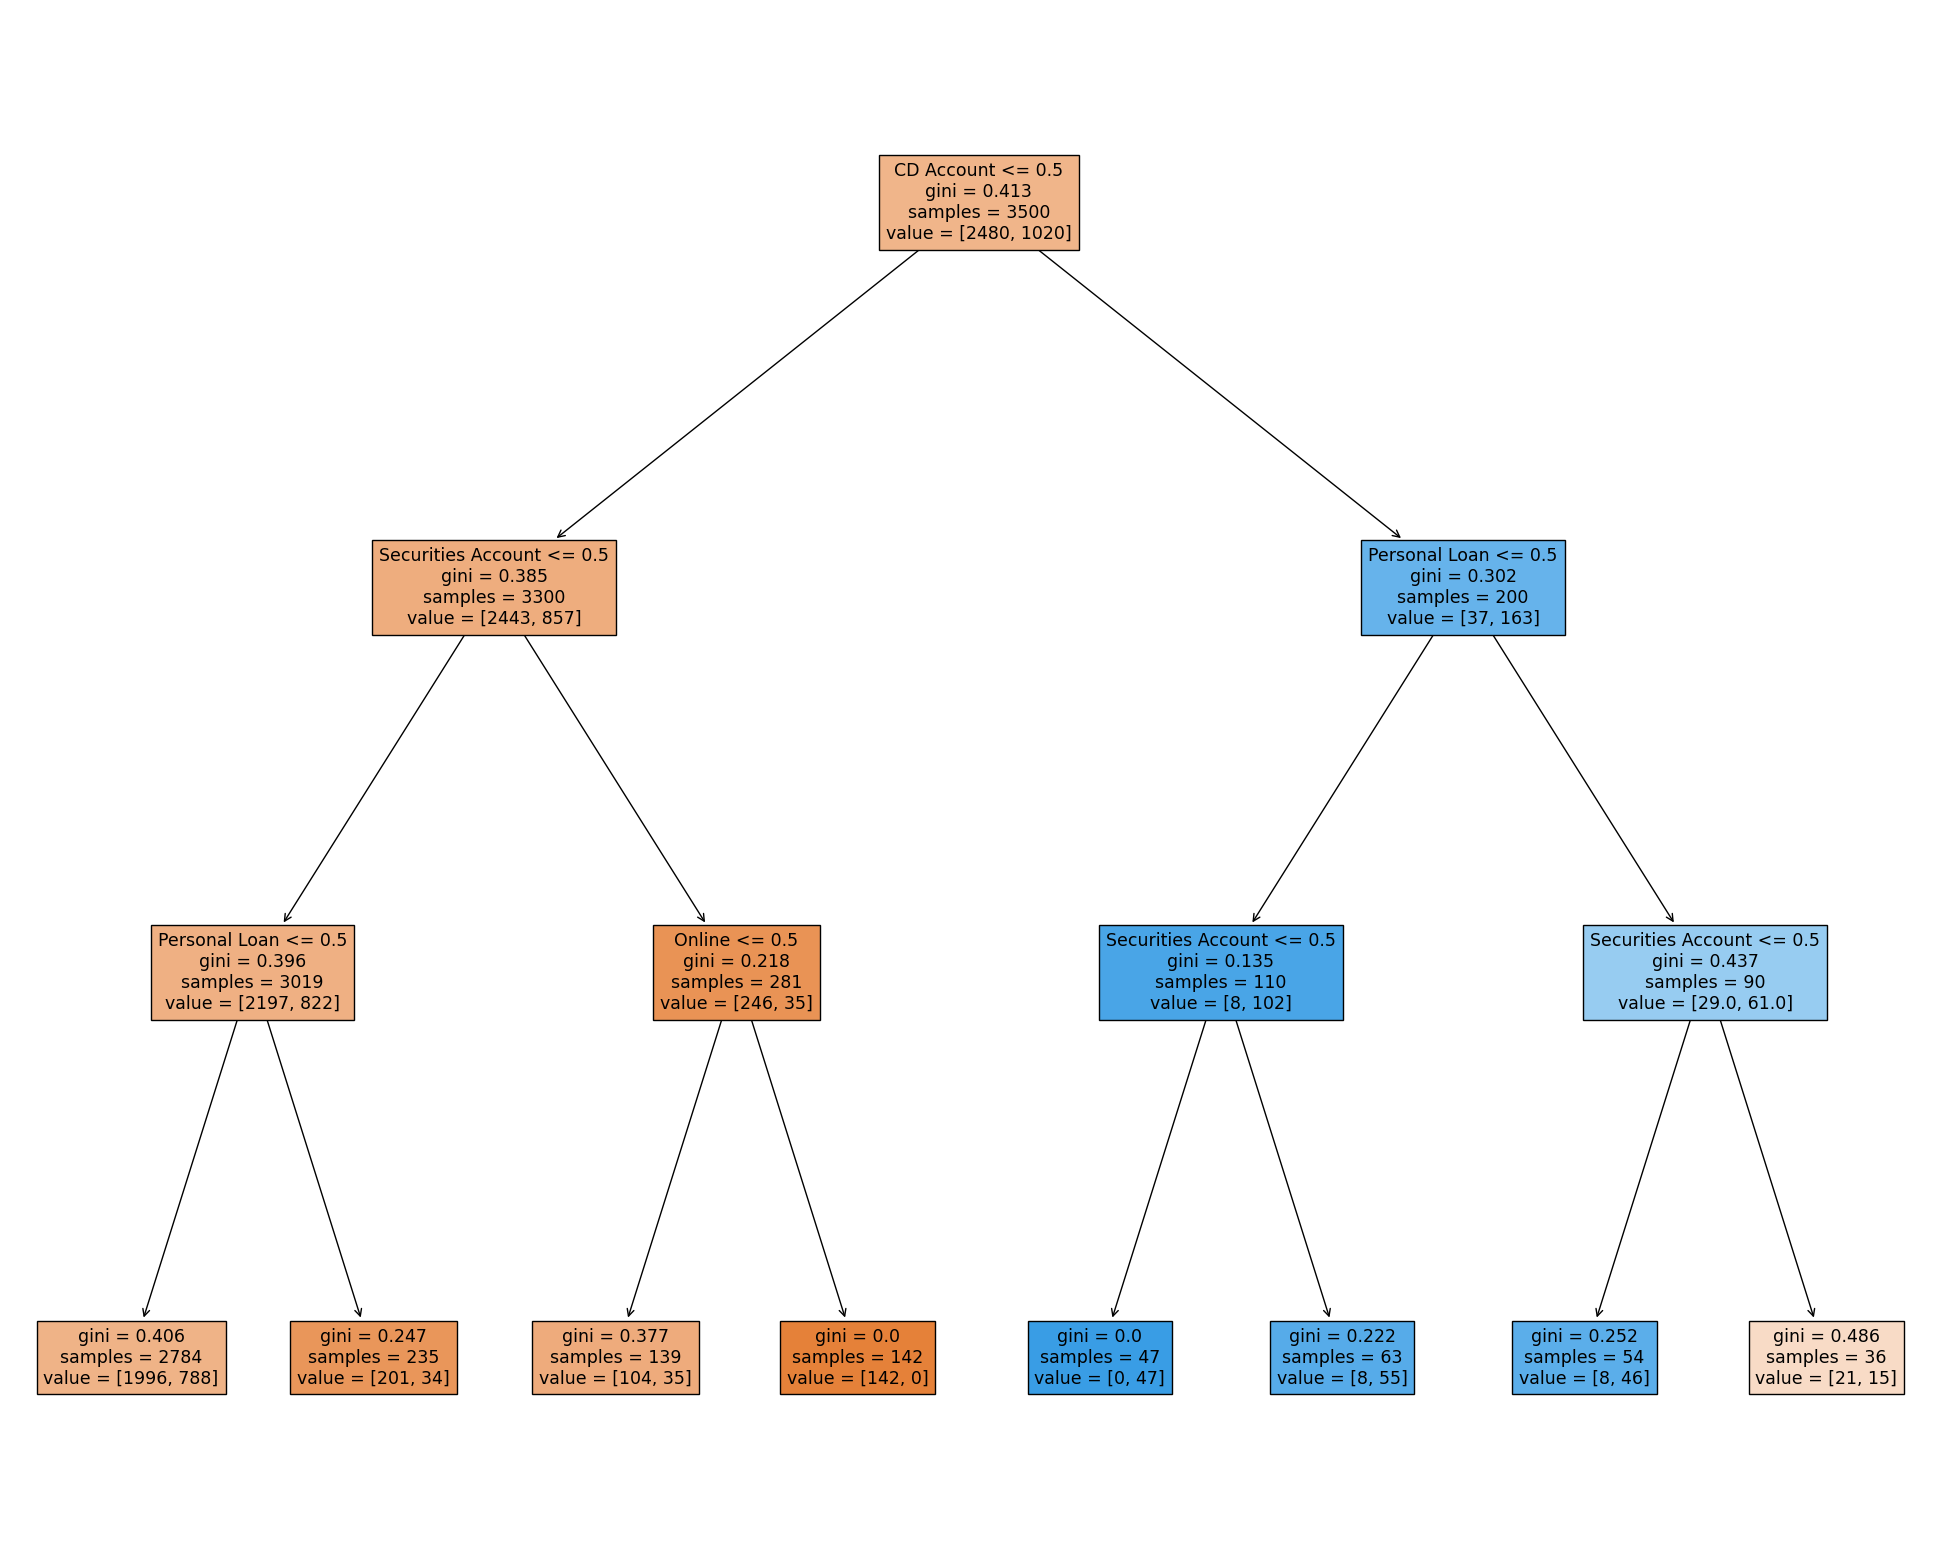

In [14]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv("BankData.csv")

print(data.head())

classes = data.drop('CreditCard', axis='columns')
target = data['CreditCard']

x_train, x_test, y_train, y_test = train_test_split(classes, target, test_size=0.3)

model1 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model1.fit(x_train, y_train)
entropy_score = model1.score(x_train, y_train)
print(f"The entropy model's score: {entropy_score}")

model2 = DecisionTreeClassifier(criterion='gini', max_depth=3)
model2.fit(x_train, y_train)
gini_score = model2.score(x_train, y_train)
print(f"The gini model's score: {gini_score}")

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
log_score = logistic_model.score(x_train, y_train)
print(f"The logistic model's score: {log_score}")

gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_score = gnb.score(x_train, y_train)
print(f"The Naive Bayes model's score: {gnb_score}")

from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model1, feature_names=x_train.columns, filled=True)

fig = plt.figure(figsize=(25,20))  
_ = tree.plot_tree(model2, feature_names=x_train.columns, filled=True)

The KNN model's score: 0.7454285714285714


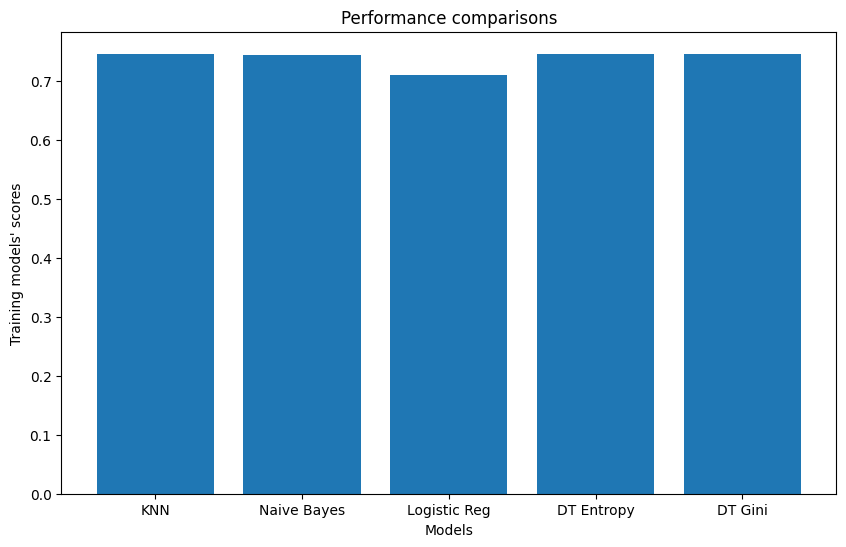

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import math

sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.fit_transform(x_test)

knn_model = KNeighborsClassifier(n_neighbors=math.floor(math.sqrt(len(y_test)))-1, p=2, metric='euclidean')
knn_model.fit(x_train, y_train)
print(f"The KNN model's score: {knn_model.score(x_train, y_train)}")

models = ['KNN', 'Naive Bayes', 'Logistic Reg', 'DT Entropy', 'DT Gini']
scores = [knn_model.score(x_train, y_train), gnb_score, log_score,
          entropy_score, gini_score]

plt.figure(figsize=(10, 6))
plt.bar(models, scores)
plt.xlabel('Models')
plt.ylabel('Training models\' scores')
plt.title('Performance comparisons')
plt.show()

We can conclude that all the models' performance is approximately equal, except for the logistic which is ranked as the worst of them. We got gini/entropy, KNN, Naive Bayes and lastly the logistic regression.